In [1]:
with open('tfidf.txt', 'r') as myfile:
    data=myfile.read().replace('\n', ' ')

In [2]:
sample_text=data.lower()

In [3]:
tokens= [word  for word in sample_text.split()]

In [4]:
import nltk as nl 

In [5]:
tokens= nl.word_tokenize(sample_text)

In [25]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens=tokenizer.tokenize(sample_text)

In [26]:
a= set(line.strip() for line in open('googlestopwords.txt'))
from nltk.corpus import stopwords

stop_words = a

In [27]:
def remove_stopwords(words):
    filtered_words=[]
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
            
    return filtered_words
print(remove_stopwords(tokens))

['guys', 'jonathan', 'lambert', 'mathematics', 'development', 'support', 'service', 'national', 'college', 'ireland', 'short', 'video', 'hope', 'short', 'deal', 'derivation', 'slope', 'intercept', 'parameters', 'regression', 'line', 'fit', 'problem', 'observations', 'important', 'paired', 'observations', 'variables', 'independent', 'dependent', 'variable', 'argument', 'sake', 'independent', 'independent', 'variable', 'symbolized', 'dependent', 'variable', 'variable', 'symbolized', 'paired', 'observations', 'observations', 'variables', 'paired', 'observations', 'suppose', 'produce', 'scatter', 'plot', 'produce', 'scatter', 'plot', 'axis', 'axis', 'showing', 'quadrant', 'doesn', 'necessarily', 'quadrant', 'observations', 'associate', 'argument', 'sake', 'observation', 'observation', 'observation', 'observations', 'observations', 'observation', 'observations', 'identify', 'line', 'dataset', 'define', 'fit', 'line', 'dataset', 'fit', 'line', 'draw', 'line', 'dataset', 'lyon', 'draw', 'fit'

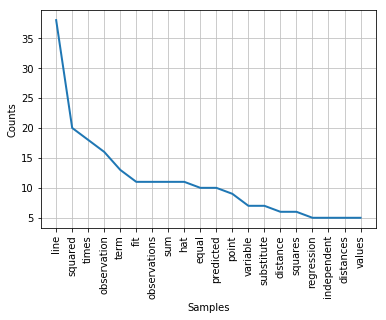

In [28]:
%matplotlib inline 
token_freq= nl.FreqDist(remove_stopwords(tokens))
token_freq.plot(20, cumulative=False)

In [85]:
bigrams=nl.bigrams(remove_stopwords(tokens))
token_freq=nl.FreqDist(bigrams)
result = []
for token  in token_freq.keys():
    result.append((token,token_freq[token]))

In [86]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.array(result),columns = list("WS"))

In [87]:
df

,W,S
0,"(guys, jonathan)",1
1,"(jonathan, lambert)",1
2,"(lambert, mathematics)",1
3,"(mathematics, development)",1
4,"(development, support)",1
5,"(support, service)",1
6,"(service, national)",1
7,"(national, college)",1
8,"(college, ireland)",1
9,"(ireland, short)",1


In [79]:
df=df.replace('\)','',regex=True).astype(str)

In [88]:
df['S']=df['S'].astype(str).astype(int)

In [98]:
np.savetxt("Labled11.csv", (df[df.S>1]), delimiter=",,", fmt='%s')

In [226]:
rakecsv = pd.read_csv("Labled1.csv")

In [227]:
rakecsv.head()


,Word1,Word2,Score,Lab
0,('hi','guys'),1,0
1,('guys','jonathan'),1,0
2,('jonathan','lambert'),1,0
3,('lambert','mathematics'),1,0
4,('mathematics','development'),1,0


In [228]:
X = rakecsv[col_name]
col_name=['Score']

In [229]:
Y= rakecsv['Lab']

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [232]:
from sklearn.linear_model import LogisticRegression

In [237]:
logreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',class_weight='balanced')

In [238]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [239]:
y_pred=logreg.predict(X_test)

In [240]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[125,  22],
       [  6,   2]], dtype=int64)

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

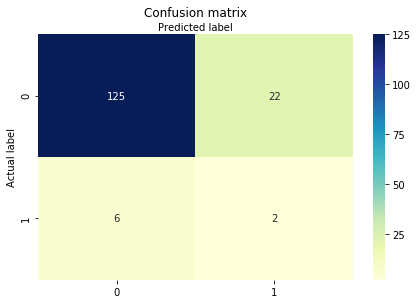

In [242]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [243]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8193548387096774
Precision: 0.08333333333333333
Recall: 0.25
